In [ ]:
!pip install geomstats

In [2]:
# Initialization
import os
import sys
import warnings

sys.path.append(os.path.dirname(os.getcwd()))
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

import geomstats.backend as gs
import geomstats.visualization as visualization

from geomstats.learning.frechet_mean import FrechetMean, linear_mean
from geomstats.learning.pca import TangentPCA

INFO: Using numpy backend


In [3]:
# Work on hypersphere
from geomstats.geometry.hypersphere import Hypersphere

sphere = Hypersphere(dim=2)
data = sphere.random_von_mises_fisher(kappa=15, n_samples=140)

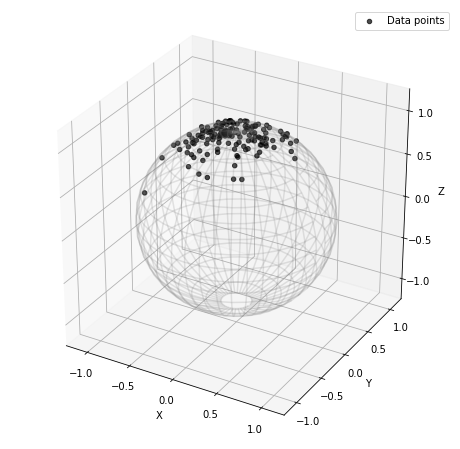

In [4]:
# Visualize data
fig = plt.figure(figsize=(8, 8))
ax = visualization.plot(data, space='S2', color='black', alpha=0.7, label='Data points')
ax.legend();

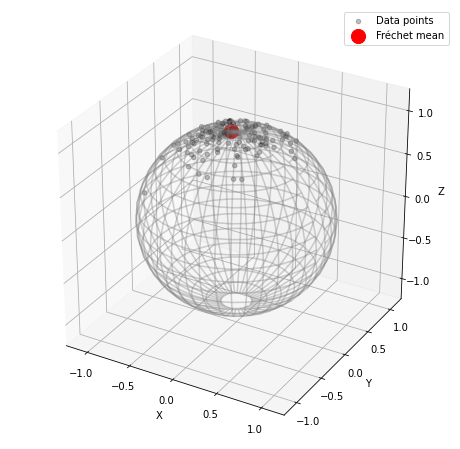

In [5]:
# Frechet mean
mean = FrechetMean(metric=sphere.metric)
mean.fit(data)

mean_estimate = mean.estimate_
fig = plt.figure(figsize=(8, 8))
ax = visualization.plot(data, space='S2', color='black', alpha=0.25, label='Data points')
ax = visualization.plot(mean_estimate, space='S2', color='red', ax=ax, s=200, label='Fréchet mean')
ax.legend();

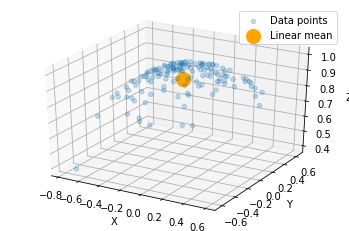

In [6]:
lin_mean = linear_mean(data)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

def unzip3(data):
    xs, ys, zs = [], [], []
    for x, y, z in data:
        xs.append(x)
        ys.append(y)
        zs.append(z)
    return xs, ys, zs

xs, ys, zs = unzip3(data)
ax.scatter(xs, ys, zs, alpha=0.25, label='Data points')
ax.scatter(lin_mean[0], lin_mean[1], lin_mean[2], color='orange', s=200, label='Linear mean')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.legend();

plt.show()

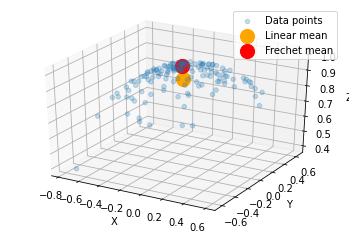

In [7]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(xs, ys, zs, alpha=0.25, label='Data points')
ax.scatter(lin_mean[0], lin_mean[1], lin_mean[2], color='orange', s=200, label='Linear mean')
ax.scatter(mean_estimate[0], mean_estimate[1], mean_estimate[2], color='red', s=200, label='Frechet mean')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.legend();

plt.show()

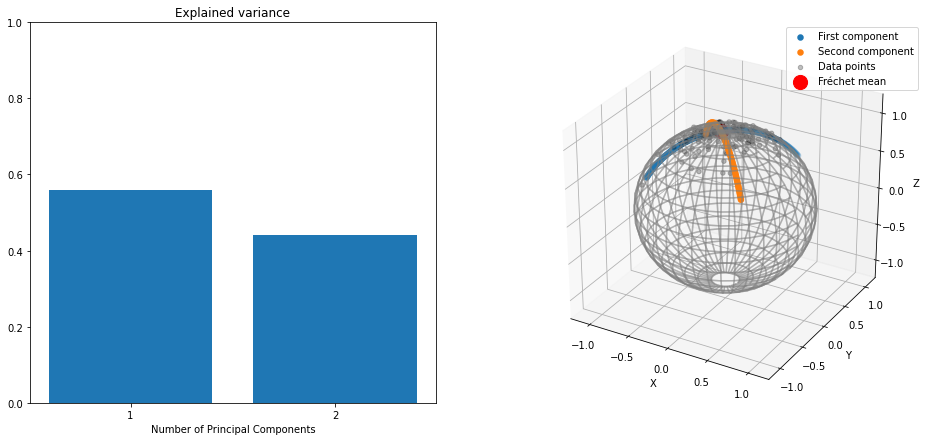

In [8]:
# Apply tangent PCA
tpca = TangentPCA(metric=sphere.metric, n_components=2)
tpca = tpca.fit(data, base_point=mean_estimate)
tangent_projected_data = tpca.transform(data)

# Geodesic
geodesic_0 = sphere.metric.geodesic(
        initial_point=mean_estimate,
        initial_tangent_vec=tpca.components_[0])
geodesic_1 = sphere.metric.geodesic(
        initial_point=mean_estimate,
        initial_tangent_vec=tpca.components_[1])

n_steps = 100
t = gs.linspace(-1., 1., n_steps)
geodesic_points_0 = geodesic_0(t)
geodesic_points_1 = geodesic_1(t)

# Visualization
fig = plt.figure(figsize=(16, 7))
ax = fig.add_subplot(121)
xticks = gs.arange(1, 2+1, 1)
ax.xaxis.set_ticks(xticks)
ax.set_title('Explained variance')
ax.set_xlabel('Number of Principal Components')
ax.set_ylim((0, 1))
ax.bar(xticks, tpca.explained_variance_ratio_)

ax = fig.add_subplot(122, projection="3d")

ax = visualization.plot(
    geodesic_points_0, ax, space='S2', linewidth=2, label='First component')
ax = visualization.plot(
    geodesic_points_1, ax, space='S2', linewidth=2, label='Second component')
ax = visualization.plot(
    data, ax, space='S2', color='black', alpha=0.25, label='Data points')
ax = visualization.plot(
    mean_estimate, ax, space='S2', color='red', s=200, label='Fréchet mean')
ax.legend()
plt.show()

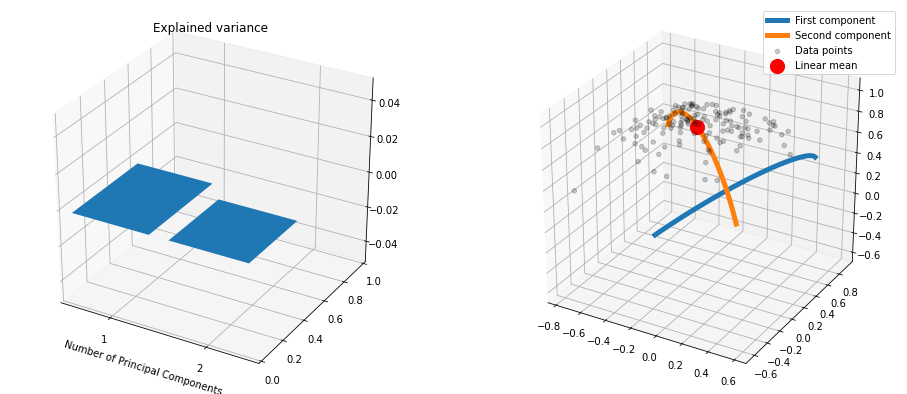

In [10]:
# Apply tangent PCA
mean_estimate_lin = linear_mean(data)
tpca = TangentPCA(metric=sphere.metric, n_components=2)
tpca = tpca.fit(data, base_point=mean_estimate_lin)
tangent_projected_data = tpca.transform(data)

# Geodesic
geodesic_0 = sphere.metric.geodesic(
        initial_point=mean_estimate_lin,
        initial_tangent_vec=tpca.components_[0])
geodesic_1 = sphere.metric.geodesic(
        initial_point=mean_estimate_lin,
        initial_tangent_vec=tpca.components_[1])

n_steps = 100
t = gs.linspace(-1., 1., n_steps)
geodesic_points_0 = geodesic_0(t)
geodesic_points_1 = geodesic_1(t)

# Visualization
fig = plt.figure(figsize=(16, 7))
ax = fig.add_subplot(121, projection='3d')
xticks = gs.arange(1, 2+1, 1)
ax.xaxis.set_ticks(xticks)
ax.set_title('Explained variance')
ax.set_xlabel('Number of Principal Components')
ax.set_ylim((0, 1))
ax.bar(xticks, tpca.explained_variance_ratio_)

ax = fig.add_subplot(122, projection="3d")

xs, ys, zs = unzip3(geodesic_points_0)
ax.plot(xs, ys, zs, linewidth=5, label='First component', zdir='y')

xs, ys, zs = unzip3(geodesic_points_1)
ax.plot(xs, ys, zs, linewidth=5, label='Second component')

xs, ys, zs = unzip3(data)
ax.scatter(xs, ys, zs, color='black', alpha=0.2, label='Data points')

ax.scatter(mean_estimate_lin[0], mean_estimate_lin[1], mean_estimate_lin[2], color='red', s=200, label='Linear mean')

ax.legend()
plt.show()

<BarContainer object of 2 artists>

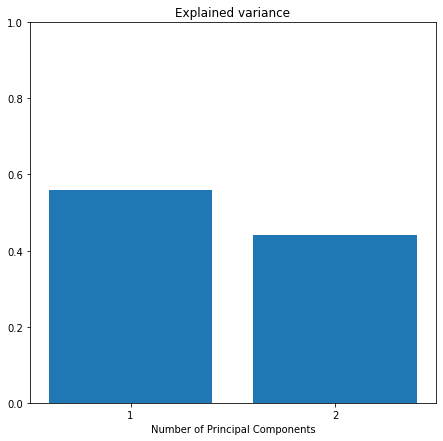

In [11]:
fig = plt.figure(figsize=(16, 7))
ax = fig.add_subplot(121)
xticks = gs.arange(1, 2+1, 1)
ax.xaxis.set_ticks(xticks)
ax.set_title('Explained variance')
ax.set_xlabel('Number of Principal Components')
ax.set_ylim((0, 1))
ax.bar(xticks, tpca.explained_variance_ratio_)

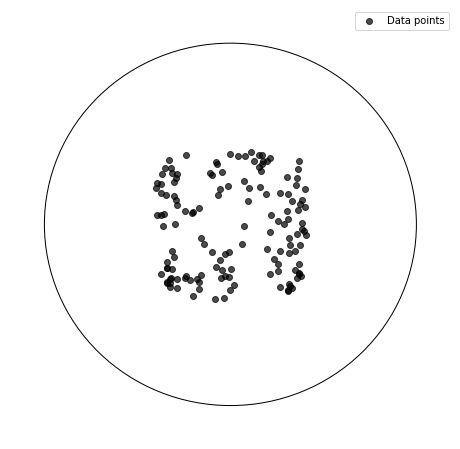

In [12]:
# Work in the hyperbolic space
from geomstats.geometry.hyperboloid import Hyperboloid

hyperbolic_plane = Hyperboloid(dim=2)

data = hyperbolic_plane.random_uniform(n_samples=140)
fig = plt.figure(figsize=(8, 8))
ax = visualization.plot(data, space='H2_poincare_disk', color='black', alpha=0.7, label='Data points')
ax.legend();

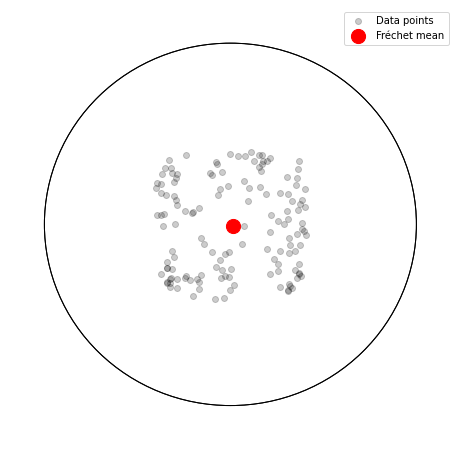

In [13]:
# Frechet mean
mean = FrechetMean(metric=hyperbolic_plane.metric)
mean.fit(data)

mean_estimate = mean.estimate_

lin_mean = linear_mean(data)

fig = plt.figure(figsize=(8, 8))
ax = visualization.plot(data, space='H2_poincare_disk', color='black', alpha=0.2, label='Data points')
ax = visualization.plot(mean_estimate, space='H2_poincare_disk', color='red', ax=ax, s=200, label='Fréchet mean')
ax.legend();

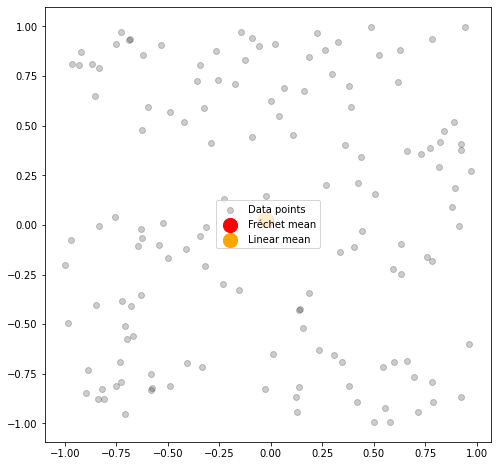

In [47]:
# Frechet mean
mean = FrechetMean(metric=hyperbolic_plane.metric)
mean.fit(data)

mean_estimate = mean.estimate_
lin_mean = linear_mean(data)

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)

xs, ys, zs = unzip3(data)
ax.scatter(zs, ys, color='black', alpha=0.2, label='Data points')
ax.scatter(mean_estimate[2], mean_estimate[1], s=200, color='red', label='Fréchet mean')
ax.scatter(lin_mean[2], lin_mean[1], s=200, color='orange', label='Linear mean')
ax.legend();

plt.show()

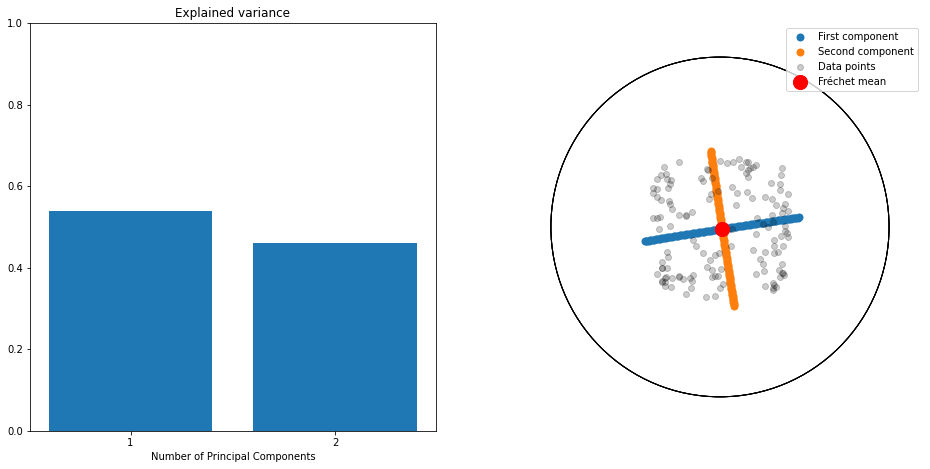

In [35]:
# Apply tangent PCA
tpca = TangentPCA(metric=hyperbolic_plane.metric, n_components=2)
tpca = tpca.fit(data, base_point=mean_estimate)
tangent_projected_data = tpca.transform(data)

# Geodesic
geodesic_0 = hyperbolic_plane.metric.geodesic(
        initial_point=mean_estimate,
        initial_tangent_vec=tpca.components_[0])
geodesic_1 = hyperbolic_plane.metric.geodesic(
        initial_point=mean_estimate,
        initial_tangent_vec=tpca.components_[1])

n_steps = 100
t = gs.linspace(-1., 1., n_steps)
geodesic_points_0 = geodesic_0(t)
geodesic_points_1 = geodesic_1(t)

# Visualization
fig = plt.figure(figsize=(16, 7.5))
ax = fig.add_subplot(121)
xticks = gs.arange(1, 2+1, 1)
ax.xaxis.set_ticks(xticks)
ax.set_title('Explained variance')
ax.set_xlabel('Number of Principal Components')
ax.set_ylim((0, 1))
ax.bar(xticks, tpca.explained_variance_ratio_)

ax = fig.add_subplot(122)

ax = visualization.plot(
    geodesic_points_0, ax, space='H2_poincare_disk', linewidth=2, label='First component')
ax = visualization.plot(
    geodesic_points_1, ax, space='H2_poincare_disk', linewidth=2, label='Second component')
ax = visualization.plot(
    data, ax, space='H2_poincare_disk', color='black', alpha=0.2, label='Data points')
ax = visualization.plot(
    mean_estimate, ax, space='H2_poincare_disk', color='red', s=200, label='Fréchet mean')
ax.legend()
plt.show()

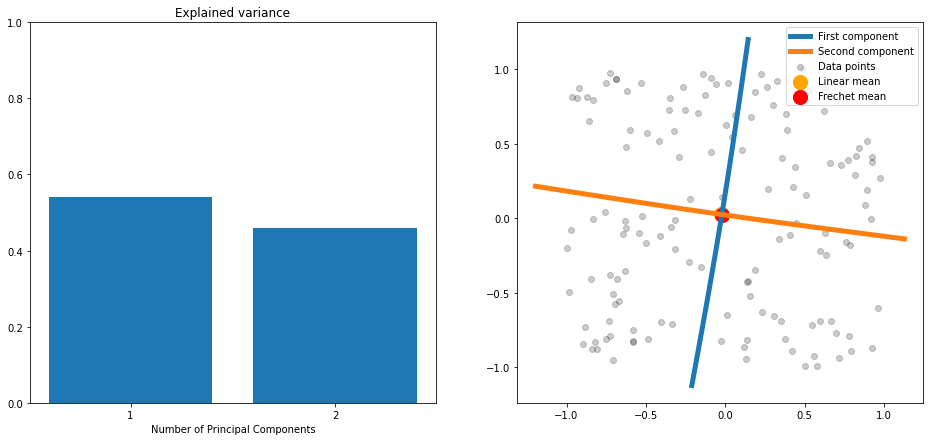

In [42]:
# Apply tangent PCA
tpca = TangentPCA(metric=hyperbolic_plane.metric, n_components=2)
tpca = tpca.fit(data, base_point=mean_estimate)
tangent_projected_data = tpca.transform(data)

# Geodesic
geodesic_0 = hyperbolic_plane.metric.geodesic(
        initial_point=mean_estimate,
        initial_tangent_vec=tpca.components_[0])
geodesic_1 = hyperbolic_plane.metric.geodesic(
        initial_point=mean_estimate,
        initial_tangent_vec=tpca.components_[1])

n_steps = 100
t = gs.linspace(-1., 1., n_steps)
geodesic_points_0 = geodesic_0(t)
geodesic_points_1 = geodesic_1(t)

# Visualization
fig = plt.figure(figsize=(16, 7))
ax = fig.add_subplot(121)
xticks = gs.arange(1, 2+1, 1)
ax.xaxis.set_ticks(xticks)
ax.set_title('Explained variance')
ax.set_xlabel('Number of Principal Components')
ax.set_ylim((0, 1))
ax.bar(xticks, tpca.explained_variance_ratio_)

ax = fig.add_subplot(122)

xs, ys, zs = unzip3(geodesic_points_0)
ax.plot(zs, ys, linewidth=5, label='First component')

xs, ys, zs = unzip3(geodesic_points_1)
ax.plot(zs, ys, linewidth=5, label='Second component')

xs, ys, zs = unzip3(data)
ax.scatter(zs, ys, color='black', alpha=0.2, label='Data points')

ax.scatter(mean_estimate_lin[2], mean_estimate_lin[1], color='orange', s=200, label='Linear mean')
ax.scatter(mean_estimate[2], mean_estimate[1], color='red', s=200, label='Frechet mean')

ax.legend()
plt.show()